In [1]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
clinical_chum = pd.read_csv("../../Data/clinical_CHUM.csv")
clinical_iucpq = pd.read_csv("../../Data/clinical_IUCPQ.csv")
clinical_chum.drop(columns="Unnamed: 0", inplace=True)
clinical_iucpq.drop(columns="Unnamed: 0", inplace=True)

pyrads_chum = pd.read_csv("../../Data/PyRads_CHUM.csv")
pyrads_iucpq = pd.read_csv("../../Data/PyRads_IUCPQ.csv")
pyrads_chum.drop(columns="Unnamed: 0", inplace=True)
pyrads_iucpq.drop(columns="Unnamed: 0", inplace=True)

In [3]:
def info_cohort(df_clinical, df_pyrads, cohort_str):
    print(cohort_str+":")
    print("Nr. Patients in clincial: ", len(df_clinical.oncotech_id.unique()))

    df_merge = df_clinical.merge(df_pyrads, how="right", on="oncotech_id")
    print("Nr. Patients in merge: ", len(df_merge.oncotech_id.unique()))
    #display(df_merge)
    print("Merge only now: ")
    print("Sex:\n", df_merge.sex.value_counts())
    print("Smoking Habit:\n", df_merge.smoking_habit.value_counts())
    print("Stage Patho Group:\n", df_merge.stage_group_patho_dx.value_counts())
    print("Stage Patho dx:\n", df_merge.stage_patho_dx.value_counts())
    df_merge["age_int"] = df_merge.age.round(0)
    #print("Youngest: ", df_merge.age_int.min())
    #print("Oldest: ", df_merge.age_int.max())
    #print("< 45: ", len(df_merge[df_merge.age_int <= 45]))
    #print("46-55: ", len(df_merge[(df_merge.age_int >45)&(df_merge.age_int <= 55)]))
    #print("56-65: ", len(df_merge[(df_merge.age_int >55)&(df_merge.age_int <= 65)]))
    #print("66-75: ", len(df_merge[(df_merge.age_int >65)&(df_merge.age_int <= 75)]))
    #print("> 75: ", len(df_merge[df_merge.age_int > 75]))
    print("Age Mean: {} Age Std: {}".format(df_merge.age.mean(), df_merge.age.std()))
    print("ECOG Status:\n", df_merge.ecog_status.value_counts())
info_cohort(clinical_chum, pyrads_chum, "CHUM")
info_cohort(clinical_iucpq, pyrads_iucpq, "IUCPQ")

CHUM:
Nr. Patients in clincial:  309
Nr. Patients in merge:  223
Merge only now: 
Sex:
 Female    112
Male      111
Name: sex, dtype: int64
Smoking Habit:
 Former     145
Current     63
Never       12
Name: smoking_habit, dtype: int64
Stage Patho Group:
 IV     123
III     55
II      25
I       20
Name: stage_group_patho_dx, dtype: int64
Stage Patho dx:
 IV      111
IIIA     30
IIIB     18
IIB      13
IA       12
IIA       8
IVA       7
IB        6
IVB       5
IIIC      4
II        4
III       3
I         2
Name: stage_patho_dx, dtype: int64
Age Mean: 66.26044394618835 Age Std: 9.05367171473763
ECOG Status:
 1    114
0     71
2     34
3      4
Name: ecog_status, dtype: int64
IUCPQ:
Nr. Patients in clincial:  231
Nr. Patients in merge:  164
Merge only now: 
Sex:
 Male      83
Female    79
Name: sex, dtype: int64
Smoking Habit:
 Former     110
Current     43
Never        9
Name: smoking_habit, dtype: int64
Stage Patho Group:
 IV     108
III     42
I        8
II       4
Name: stage_group_

In [4]:
clinical_chum.columns

Index(['oncotech_id', 'center', 'sex', 'dob', 'age', 'weight', 'height', 'bmi',
       'smoking_habit', 'smoking_1st_io', 'date_patho_dx', 'ecog_status',
       'histology_group', 'stage_patho_dx', 'stage_group_patho_dx',
       'stage_1st_io', 'stage_group_1st_io', 'biospecimen', 'biosite',
       'alk_status', 'braf_status', 'egfr_status', 'kras_status', 'met_status',
       'nras_status', 'pdl1_tps', 'pdl1_tps_num', 'pdl1_group', 'ntrk_status',
       'ret_status', 'ros1_status', 'tp53_status', 'pre_radiation',
       'pre_chemo', 'first_line_io', 'io_type', 'io_start_date',
       'io_finish_date', 'date_progression', 'date_death',
       'date_last_follow_up', 'progression', 'death', 'recist_9weeks',
       'recist_6months', 'recist_12months', 'best_clinical_response', 'orr',
       'pfs_days', 'pfs_months', 'os_days', 'os_months', 'pfs_6months',
       'pfs_1year', 'pfs_2year', 'os_1year'],
      dtype='object')

In [12]:
CHUM_os_days = clinical_chum.os_days
IUCPQ_os_days = clinical_iucpq.os_days


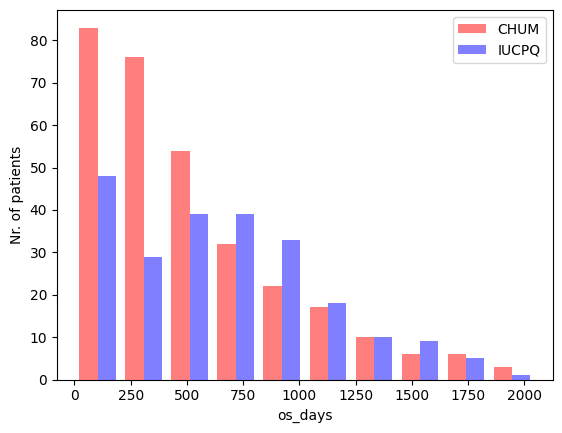

In [28]:
ax = plt.hist([CHUM_os_days, IUCPQ_os_days], color=['r','b'], alpha=0.5, label=["CHUM", "IUCPQ"])
#ax.set(xlabel='os_days', ylabel='Nr. of patients')
plt.xlabel("os_days")
plt.ylabel("Nr. of patients")
plt.legend()